# machine-learning-zoomcamp Week 2 : regression model for predicting the prices

## 1. Import Library

In [623]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## 2. Loading Dataset

In [624]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [625]:
df = pd.read_csv('laptops.csv')

df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [626]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


## 3. Exploratory Data Analysis (EDA)

In [628]:
# Selecting UseCols

df = df[['ram', 'storage', 'screen', 'final_price']]

df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [629]:
# Checking for missing values
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [630]:
# Checking statistics
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


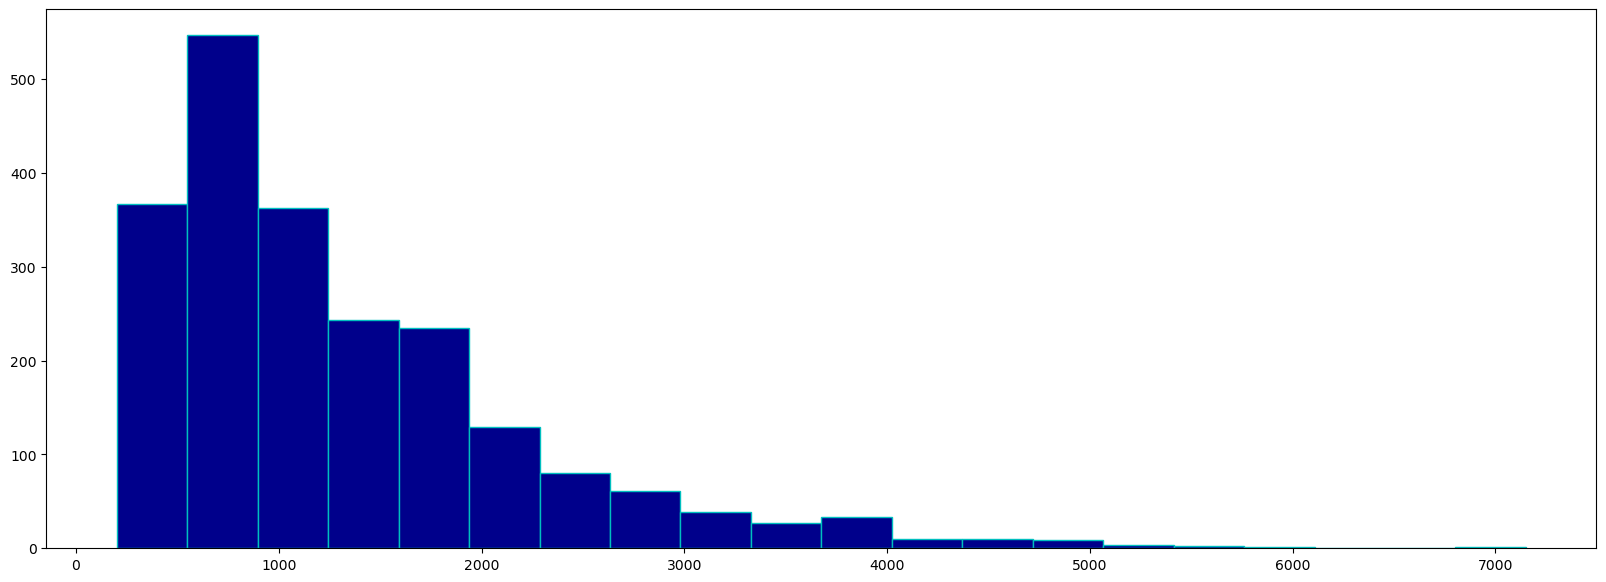

In [631]:
# final_price column's value histogram

df['final_price'].hist(bins=20, figsize=(20,7), grid=False, color='darkblue', edgecolor='c')
plt.show()

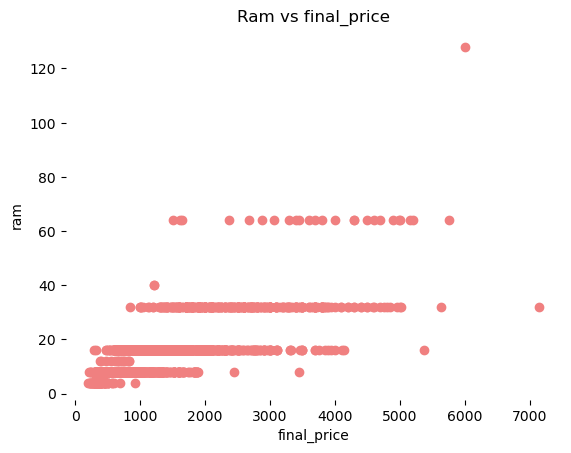

In [632]:
# Relationship between Salary and Experience
plt.scatter(df['final_price'], df['ram'], color = 'lightcoral')
plt.title('Ram vs final_price')
plt.xlabel('final_price')
plt.ylabel('ram')
plt.box(False)
plt.show()

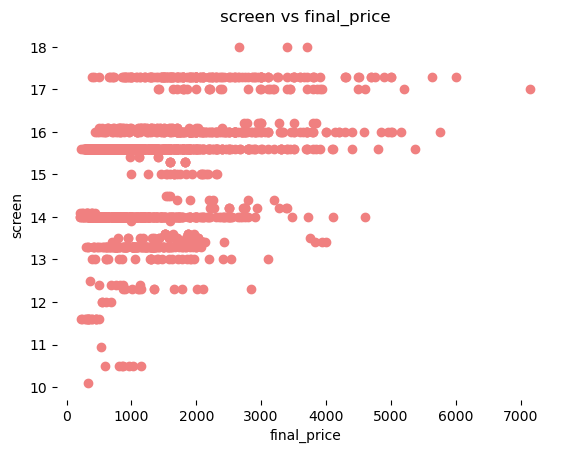

In [633]:
plt.scatter(df['final_price'], df['screen'], color = 'lightcoral')
plt.title('screen vs final_price')
plt.xlabel('final_price')
plt.ylabel('screen')
plt.box(False)
plt.show()

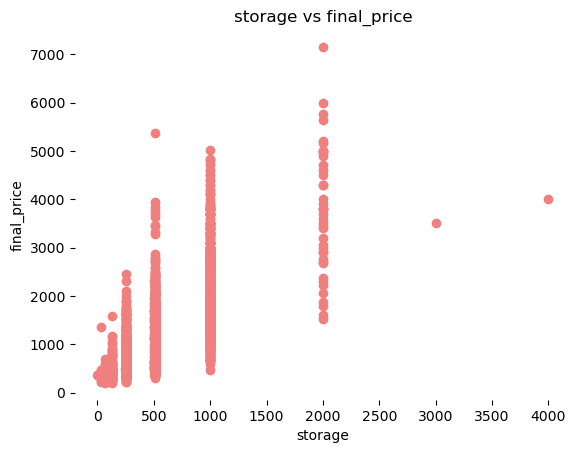

In [634]:
plt.scatter(df['storage'], df['final_price'], color = 'lightcoral')
plt.title('storage vs final_price')
plt.ylabel('final_price')
plt.xlabel('storage')
plt.box(False)
plt.show()

## 4. Data Preprocessing

### 1. Splitting data into train, test, and validation

In [635]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)

In [636]:
len(df_train), len(df_test), len(df_val)

(1296, 432, 432)

In [637]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [638]:
# Split between X (features) and y (target)

X_train = df_train.drop('final_price', axis=1)
y_train = df_train['final_price']

X_test = df_test.drop('final_price', axis=1)
y_test = df_test['final_price']

X_val = df_val.drop('final_price', axis=1)
y_val = df_val['final_price']

In [639]:
print(len(X_train)*100/len(df))
print(len(X_test)*100/len(df))
print(len(X_val)*100/len(df))

60.0
20.0
20.0


### 2. preprocessing

In [640]:
# # Fillna with 0

# X_train = X_train.fillna(0)
# X_val['screen'] = X_val['screen'].fillna(0)

# #check null values
# X_train.isnull().sum()

## 5. Model Training

In [641]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.round(np.sqrt(mse), 2)

def prepare_X(df, fillna=0):
    df = df.fillna(fillna)
    X = df.values
    return X

### 1. Baseline Model: fillna with 0

In [642]:
df_train.isnull().sum()

ram            0
storage        0
screen         2
final_price    0
dtype: int64

In [643]:
# Linear Regression
X_train_0 = prepare_X(X_train)
w_0, w = train_linear_regression(X_train_0, y_train)

In [644]:
# Prediction result
y_pred_0 = w_0 + X_train_0.dot(w)
print('train:', rmse(y_train, y_pred_0))

X_val_0 = prepare_X(X_val)
y_pred_val_0 = w_0 + X_val_0.dot(w)
print('validation:', rmse(y_val, y_pred_val_0))

train: 582.71
validation: 581.35


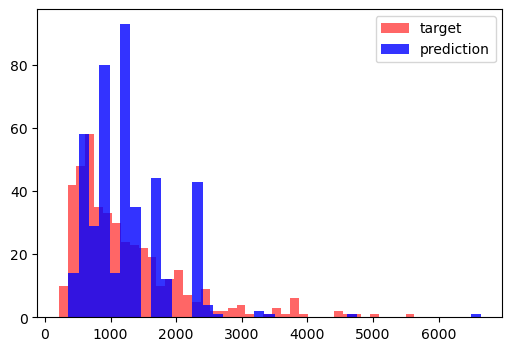

In [645]:
plt.figure(figsize=(6, 4))

# Plot histograms for y_train and y_pred
plt.hist(y_val, label='target', color='red', alpha=0.6, bins=40)
plt.hist(y_pred_val_0, label='prediction', color='blue', alpha=0.8, bins=40)

# Add legend
plt.legend()

# Show the plot
plt.show()

### 2. Baseline Model: fillna with mean

In [646]:
# Linear Regression
X_train_mean = prepare_X(X_train, fillna=np.mean(X_train))
w_0, w = train_linear_regression(X_train_mean, y_train)

In [647]:
# Prediction result
y_pred_mean = w_0 + X_train_mean.dot(w)
print('train:', rmse(y_train, y_pred_mean))

X_val_0 =prepare_X(X_val, fillna=np.mean(X_train))
y_pred_val_0 = w_0 + X_val_0.dot(w)
print('validation:', rmse(y_val, y_pred_val_0))

train: 584.79
validation: 580.97


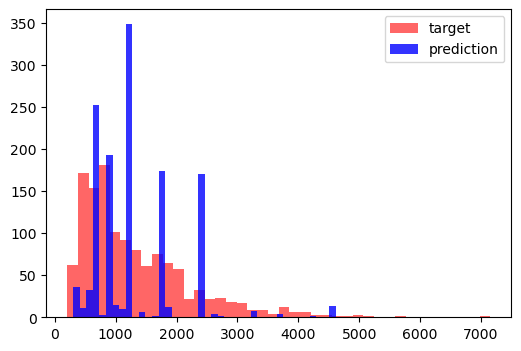

In [648]:
plt.figure(figsize=(6, 4))

# Plot histograms for y_train and y_pred
plt.hist(y_train, label='target', color='red', alpha=0.6, bins=40)
plt.hist(y_pred_mean, label='prediction', color='blue', alpha=0.8, bins=40)

# Add legend
plt.legend()

# Show the plot
plt.show()

### 3. Linear Model with Regularization

In [649]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [651]:
X_train = prepare_X(X_train)
X_val = prepare_X(X_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    print(r)
    w_0_reg, w_reg = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_mean = w_0_reg + X_train.dot(w_reg)
    print('train:', rmse(y_train, y_pred_mean))
    y_pred_val = w_0_reg + X_val.dot(w_reg)
    print('validation:', rmse(y_val, y_pred_val))
    print("==========================================")


0
train: 582.71
validation: 581.35
0.01
train: 582.71
validation: 581.35
0.1
train: 582.71
validation: 581.3
1
train: 582.74
validation: 580.91
5
train: 583.12
validation: 580.04
10
train: 583.62
validation: 579.71
100
train: 585.65
validation: 579.78


## 6. find out how selecting the seed influences our score

In [677]:
df = df.copy()

In [678]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=1)

In [680]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [681]:
# Split between X (features) and y (target)

X_train = df_train.drop('final_price', axis=1)
y_train = df_train['final_price']

X_test = df_test.drop('final_price', axis=1)
y_test = df_test['final_price']

X_val = df_val.drop('final_price', axis=1)
y_val = df_val['final_price']

In [682]:
# Linear Regression
X_train_0 = prepare_X(X_train)
w_0, w = train_linear_regression(X_train_0, y_train)
# Prediction result
y_pred_0 = w_0 + X_train_0.dot(w)
print('train:', rmse(y_train, y_pred_0))

X_val_0 = prepare_X(X_val)
y_pred_val_0 = w_0 + X_val_0.dot(w)
print('validation:', rmse(y_val, y_pred_val_0))

train: 570.47
validation: 683.56


In [689]:
list_of_rmse_val = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df = df.copy()
    print(seed)

    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    # Split between X (features) and y (target)
    X_train = df_train.drop('final_price', axis=1)
    y_train = df_train['final_price']

    X_val = df_val.drop('final_price', axis=1)
    y_val = df_val['final_price']
    
    # Linear Regression
    X_train = prepare_X(X_train)
    w_0, w = train_linear_regression(X_train, y_train)

    # Prediction result
    y_pred = w_0 + X_train.dot(w)
    # print('train:', rmse(y_train, y_pred))

    X_val = prepare_X(X_val)
    y_pred_val = w_0 + X_val.dot(w)
    print('validation:', rmse(y_val, y_pred_val))

    list_of_rmse_val.append(rmse(y_val, y_pred_val))

    print("==========================================")    

0
validation: 565.45
1
validation: 636.8
2
validation: 588.96
3
validation: 597.81
4
validation: 571.96
5
validation: 573.24
6
validation: 647.34
7
validation: 550.44
8
validation: 587.33
9
validation: 576.1


In [690]:
np.round(np.std(list_of_rmse_val),3)

29.176

---

In [695]:
for seed in [9]:
    df = df.copy()
    print(seed)

    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = pd.concat([df_train,df_val]).reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Split between X (features) and y (target)
    X_train = df_train.drop('final_price', axis=1)
    y_train = df_train['final_price']

    X_test = df_test.drop('final_price', axis=1)
    y_test = df_test['final_price']
    
    # Linear Regression
    X_train = prepare_X(X_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

    # Prediction result
    y_pred = w_0 + X_train.dot(w)
    print('train:', rmse(y_train, y_pred))

    X_test = prepare_X(X_test)
    y_pred_test = w_0 + X_test.dot(w)
    print('test:', rmse(y_test, y_pred_test))

    print("==========================================")    

9
train: 586.19
test: 608.61
